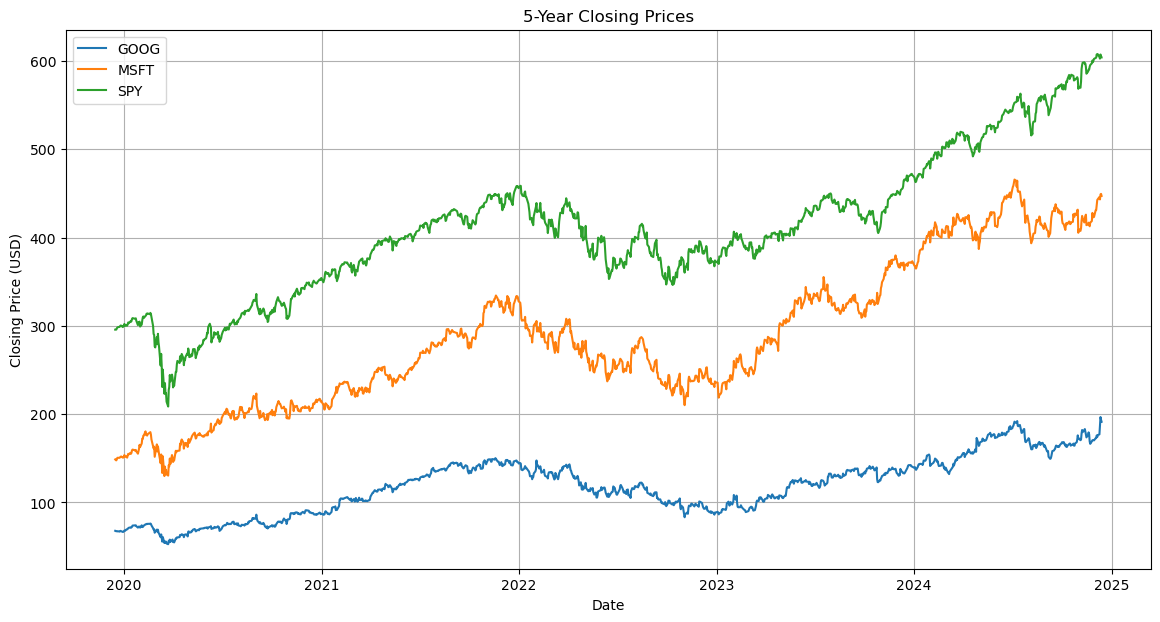

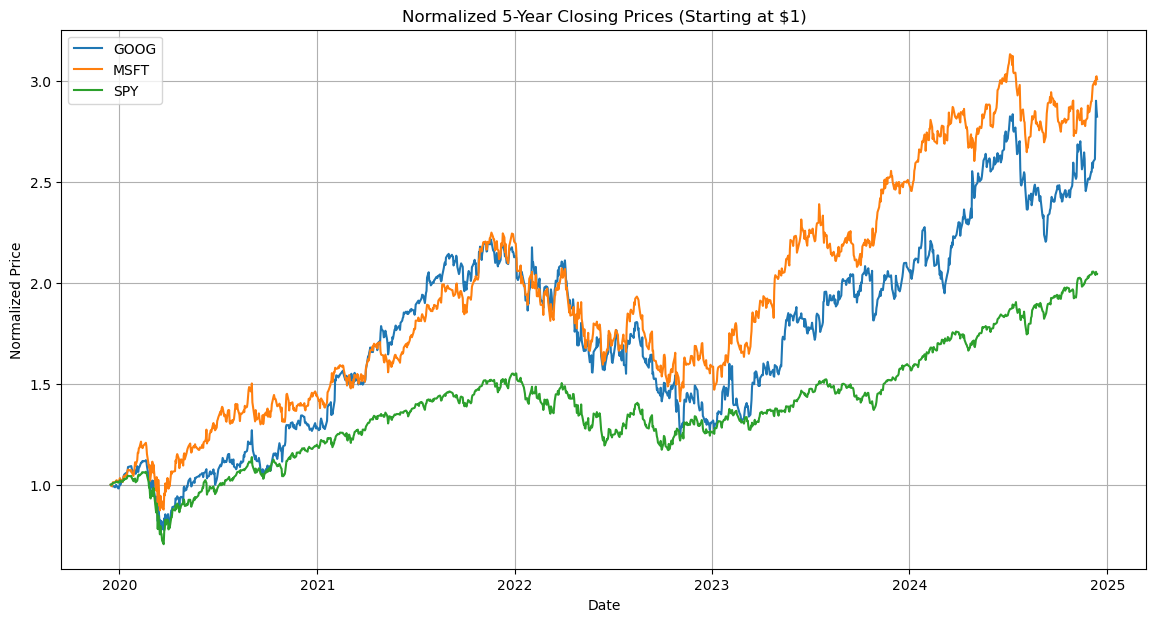


Beta Values:
MSFT: 0.904
GOOG: 1.034

Market Return (annualized): 0.16526630178069293
Market Risk Premium: 0.14526630178069294

Risk Premium for MSFT: 0.13132073680974643

Risk Premium for GOOG: 0.1502053560412365

Value at Risk (VaR) and Expected Shortfall (ES) at 95% confidence level:
GOOG VaR: -3.06%
GOOG Expected Shortfall: -4.66%
MSFT VaR: -2.84%
MSFT Expected Shortfall: -4.29%

Portfolio VaR: -2.83%


In [3]:
# Calculate Porfolio VaR for a 50:50 portfolio of MSFT and GOOG

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# Define the stock symbols and the period
symbols = ['GOOG', 'MSFT', 'SPY']
period = '5y'

# Create an empty DataFrame to store the closing prices
data = pd.DataFrame()

# Fetch the closing prices for each stock
for symbol in symbols:
    data[symbol] = yf.Ticker(symbol).history(period=period)['Close']

# Plot the original closing prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(data.index, data[symbol], label=symbol)

plt.title('5-Year Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Normalize the prices so they all start at $1
normalized_data = data / data.iloc[0] * 1

# Plot the normalized prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(normalized_data.index, normalized_data[symbol], label=symbol)

plt.title('Normalized 5-Year Closing Prices (Starting at $1)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily returns for each stock
returns = data.pct_change().dropna()

# Fetch the Beta for MSFT and GOOG and store them in a dictionary
beta_data = {}
for symbol in ['MSFT', 'GOOG']:
    ticker_info = yf.Ticker(symbol).info
    if 'beta' in ticker_info:
        beta_data[symbol] = ticker_info['beta']
    else:
        beta_data[symbol] = None  # Handle missing Beta data

# Print the Beta for MSFT and GOOG
print("\nBeta Values:")
for symbol, beta in beta_data.items():
    print(f"{symbol}: {beta}")

# Calculate the market risk premium
risk_free_rate = 0.02  # assuming a 2% risk-free rate
market_return = returns['SPY'].mean() * 252  # annualized market return (SPY)
market_risk_premium = market_return - risk_free_rate

print(f"\nMarket Return (annualized): {market_return}")
print(f"Market Risk Premium: {market_risk_premium}")

# Calculate the risk premium for GOOG and MSFT
for symbol in ['MSFT', 'GOOG']:
    beta = beta_data[symbol]
    risk_premium = beta * market_risk_premium
    print(f"\nRisk Premium for {symbol}: {risk_premium}")

# Calculate Value at Risk (VaR) for GOOG and MSFT
confidence_level = 0.95  # 95% confidence level
VaR = {}
expected_shortfall = {}

for symbol in ['GOOG', 'MSFT']:
    # Calculate the daily VaR
    daily_returns = returns[symbol]
    VaR[symbol] = np.percentile(daily_returns, (1 - confidence_level) * 100)
    
    # Calculate Expected Shortfall (Conditional VaR)
    expected_shortfall[symbol] = daily_returns[daily_returns <= VaR[symbol]].mean()

# Print the VaR and Expected Shortfall for GOOG and MSFT
print("\nValue at Risk (VaR) and Expected Shortfall (ES) at 95% confidence level:")
for symbol in ['GOOG', 'MSFT']:
    print(f"{symbol} VaR: {VaR[symbol] * 100:.2f}%")
    print(f"{symbol} Expected Shortfall: {expected_shortfall[symbol] * 100:.2f}%")

# Calculate Portfolio VaR
portfolio_weights = np.array([0.5, 0.5])  # Example weights for a 50-50 portfolio
portfolio_returns = returns[['GOOG', 'MSFT']].dot(portfolio_weights)
portfolio_VaR = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
print(f"\nPortfolio VaR: {portfolio_VaR * 100:.2f}%")

